In [19]:
# this is using the genePathwayManifold virtual environment
import scvelo as scv
import scanpy as sc
import pandas
scv.logging.print_version()

Running scvelo 0.3.1 (python 3.11.5) on 2024-03-21 10:14.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization


In [3]:
adata = scv.datasets.gastrulation_erythroid(file_path='/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/yenchi-jerry_yuhong/out/veloUncertainty/kevin/Writeup1/data/Gastrulation/erythroid_lineage.h5ad')
adata

100%|██████████| 463M/463M [01:20<00:00, 6.05MB/s] 


AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [4]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors


/var/folders/hs/22vv3mms6xbbkl2xk5frsnhc0000gp/T/ipykernel_4799/3094439058.py:4: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata)


    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
del adata.obsm['X_umap']

In [7]:
del adata.obsm['X_pca']

In [9]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [10]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.


/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/

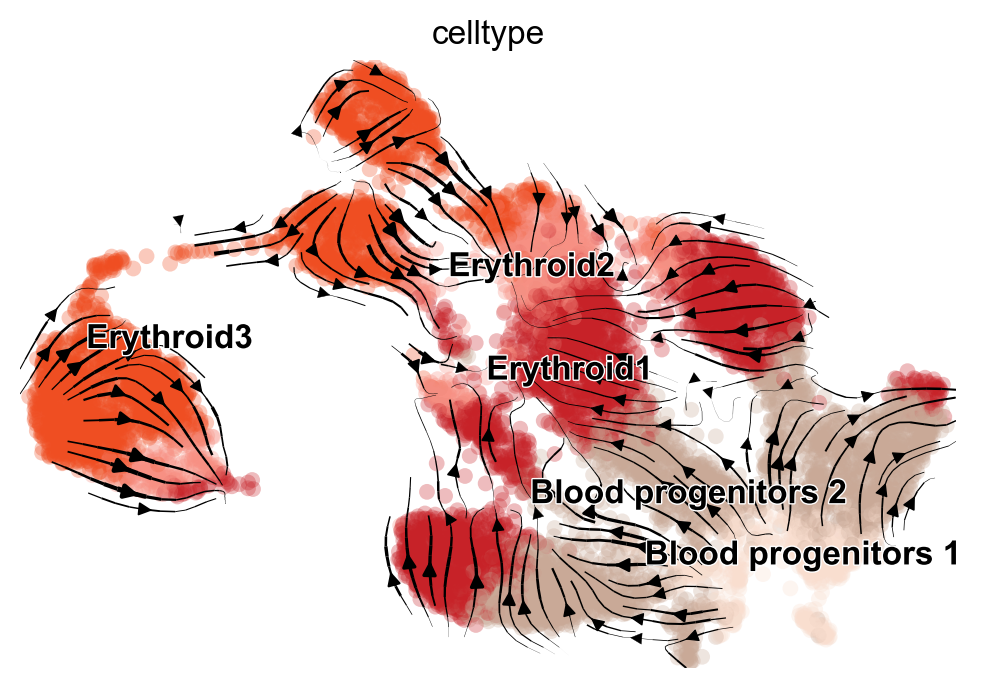

In [11]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color='celltype')

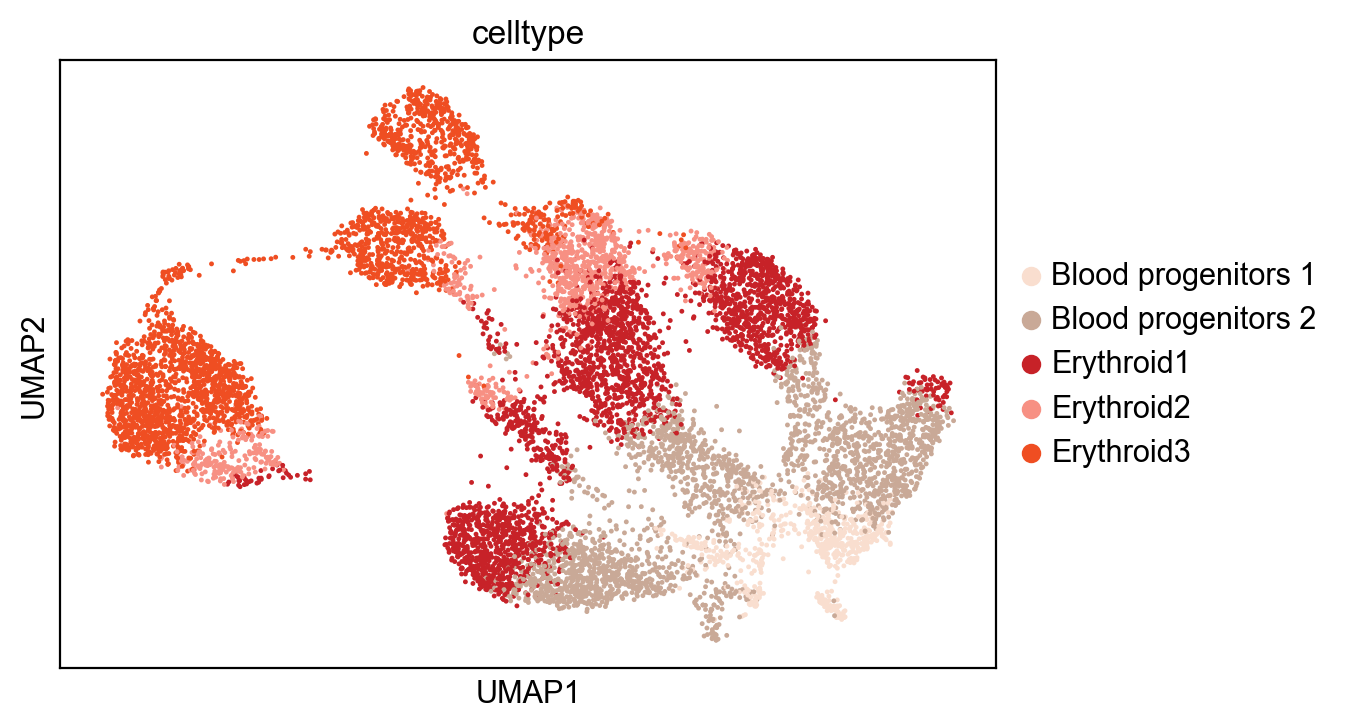

In [13]:
sc.pl.umap(adata, color='celltype')

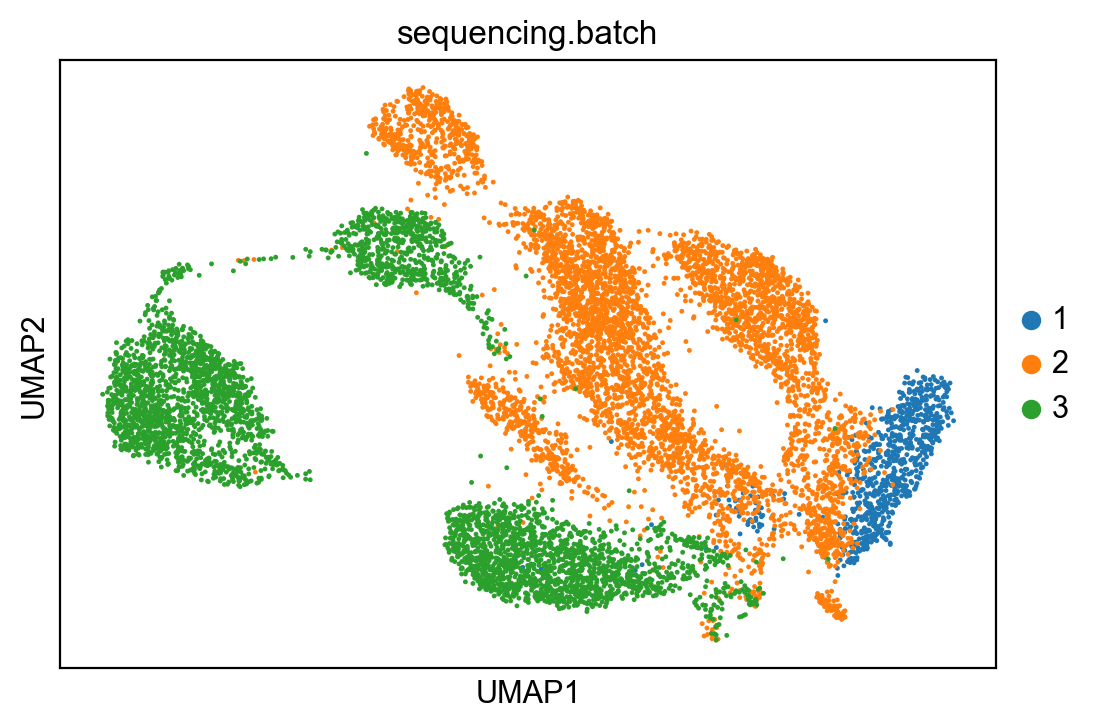

In [14]:
sc.pl.umap(adata, color='sequencing.batch')

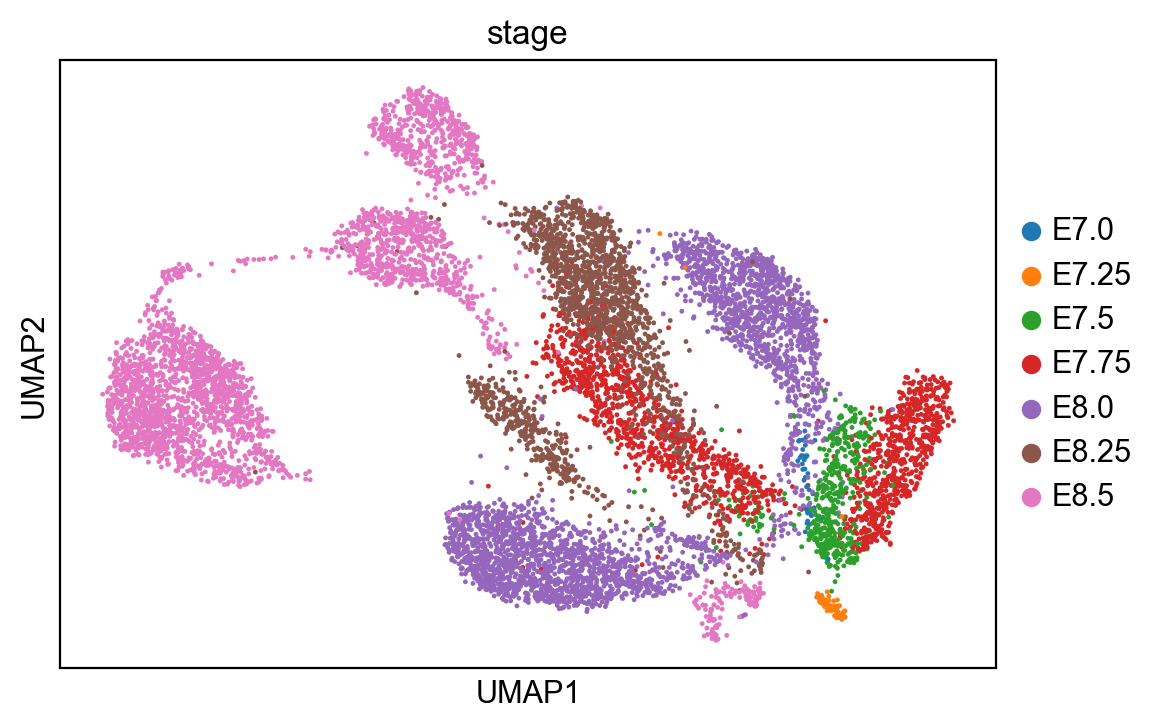

In [15]:
sc.pl.umap(adata, color='stage')

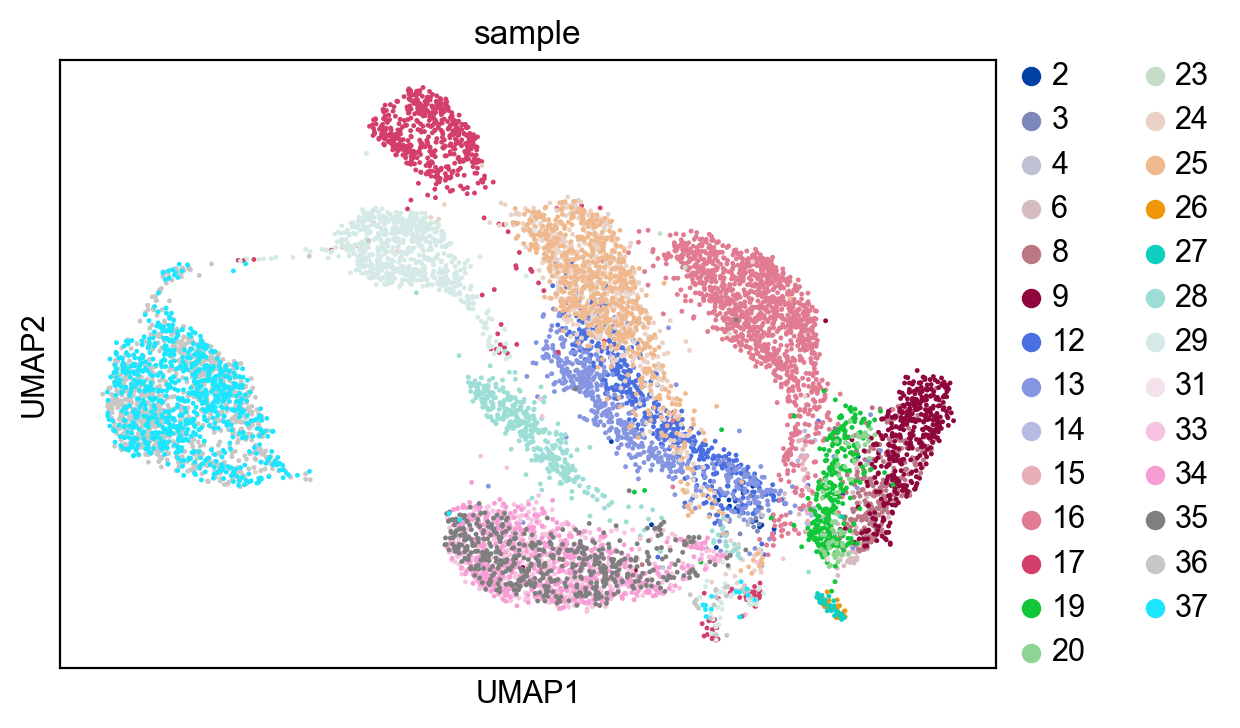

In [16]:
sc.pl.umap(adata, color='sample')

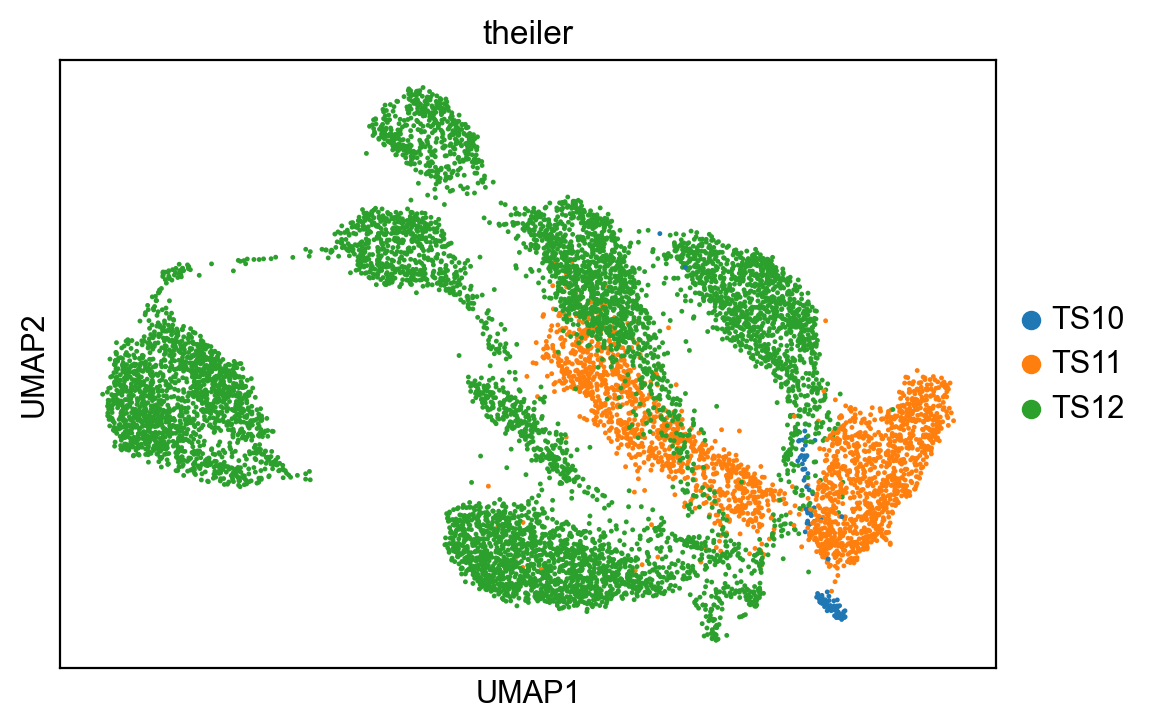

In [17]:
sc.pl.umap(adata, color='theiler')

In [21]:
pandas.crosstab(adata.obs['celltype'], adata.obs['sequencing.batch'])

sequencing.batch,1,2,3
celltype,,,
Blood progenitors 1,154,370,99
Blood progenitors 2,557,1082,821
Erythroid1,67,2037,825
Erythroid2,0,812,294
Erythroid3,0,670,2027


In [22]:
adata

AnnData object with n_obs × n_vars = 9815 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'celltype_colors', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'sequencing.batch_colors', 'stage_colors', 'sample_colors', 'theiler_colors'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'